# **Practica 1:** Coalición Sospechosa.

del Valle Vera Nancy Elena


In [1]:
# Bibliotecas Necesarias
import random as rd
import networkx as nx
import matplotlib.pyplot as plt

**Algoritmo No Determinista**

In [2]:
# Fase de Adivinación
def adivinacion(usuarios):
  '''
    Función que se encarga de ejecutar la fase de adivinación del algoritmo no Determinista.
    Parametros:
      usuarios : Lista de usuarios

    Salida:
      sospechosos : Lista de usuarios escogidos al azar
  '''
  # Regresa una lista de usuarios escogidos al azar
  sospechosos = []
  for user in usuarios:
    # La decisión aleatoria esta dada por 'tirar una moneda', donde 0
    # corresponde a sol (no agregamos) y uno a aguila (agregamos).
    if rd.randint(0,1) == 1:
      sospechosos.append(user)

  return sospechosos

In [3]:
# Fase de Verificación
def verificacion(sospechosos, accesos, ipAtacadas, k):
  '''
    Función que se encarga de ejecutar la fase de verificación del algoritmo no Determinista.
    Parametros:
      sospechosos : Lista de usuarios escogidos al azar
      accesos : diccionario estilo { usuario1 : [(minuto1, ipAccedida1), ... (minutoN, ipAccedidaN)], ..., usuarioN : [...]}
      ipAtacadas : Lista de las ip's atacadas
      k : Tamaño máximo de la coalición sospechosa

    Salida:
      True si la coalición es correcta, False en caso contrario
  '''
  # Si la lista de sospechoso no tiene máximo tamaño k se descarta la elección
  if len(sospechosos) > k:
    return False

  # Por cada sospechoso revisamos sus accesos a todas las ips disponibles,
  # si la ip esta entre las atacadas y el minuto accedido coincide con la m
  # asociada a la ip lo agregamos a la lista pues esto indica que al menos
  # uno de los usuarios sospechosos accedio a la direccion atacada en el minuto correcto
  ips = []
  for s in sospechosos:
    for (m, ip) in accesos[s]:
      if ip in ipAtacadas and m == ip:
        if ip not in ips:
          ips.append(ip)

  # Al final, si ambas listas tienen la misma longitud implica que se eligio a
  # la coalicion sospechosa correcta
  return len(ips) == len(ipAtacadas)


In [4]:
# Algoritmo no Determinista
def Nodeterminista(accesos, ipAtacadas, k):
  '''
     Función que ejecuta el algoritmo no determinista.
     Parametros:
      accesos : diccionario estilo { usuario1 : [(minuto1, ipAccedida1), ... (minutoN, ipAccedidaN)], ..., usuarioN : [...]}
      ipAtacadas : Lista de las ip's atacadas
      k : Tamaño máximo de la coalición sospechosa

    Salida:
      True si la coalición es correcta, False en caso contrario
  '''
  usuarios = list(accesos.keys())
  sospechosos = adivinacion(usuarios)
  print(sospechosos)
  return verificacion(sospechosos, accesos, ipAtacadas,k)

In [5]:
# Ejemplo visto durante las ayudantias
acc = {'A' : [(1, 1)], 'B': [(2, 2)], 'C' : [(1,1), (2,2)]}
ipA = [1, 2]
k = 1

Nodeterminista(acc, ipA, k)

['A', 'B']


False

In [7]:
# Ejemplo 2
acc = {'1' : [(1, 1), (2, 1)], '2': [(2, 2), (3, 3)], '3' : [(1, 5), (2, 3), (3, 4)], '4' : [(1, 1), (4, 4), (3, 5)], '5': [(1, 2), (2, 5), (3, 3)]}
# Suponemos que las direcciones fueron atacadas en el minuto de su enumeración
ipA = [2, 4, 3]
k = 2

# Prueba Algoritmo No Determinista
Nodeterminista(acc, ipA, k)


# Prueba Verificación

# Usuarios 3 y 2 (Solución Erronea)
#verificacion(['3', '2'], acc, ipA, k)

# Usuarios 2 y 4 (Solución Correcta)
#verificacion(['2', '4'], acc, ipA, k)

['2']


False

**Reducción desde Vertex Cover**

In [8]:
# Dada una lista de adyacencias como diccionario, regresa una
# lista de vertices y una lista con las aristas sin repetir, donde,
# consideramos que (u, v) es igual a (v, u).
def elementosG (listaAdyacencias):
  '''
     Función que se encarga de regresar los vertices y aristas.
     Parametros:
      listaAdyacencias : diccionario estilo { vertice1 : [u1, ..., uN], ..., verticeN : [...]}

     Salida:
      vertices : Lista de vertices
      aristas : Lista de aristas
  '''
  vertices = list(listaAdyacencias.keys())
  aristas = []

  for v in vertices:
    for u in listaAdyacencias[v]:
      if (u, v) not in aristas:
        aristas.append((v, u))

  return vertices, aristas

# Dado un ejemplar de Vertex Cover regresa un diccionario con los
# usuarios y sus accesos con minutos a las ip's, junto a una lista
# de las ip's atacadas.
def reduccion (listaAdyacencias):
  '''
     Función que se encarga de realizar la reducción desde un ejemplar de Vertex
     Cover a uno de la Coalisión Sospechosa.
     Parametros:
      listaAdyacencias : diccionario estilo { vertice1 : [u1, ..., uN], ..., verticeN : [...]}

     Salida:
      acc : diccionario estilo { usuario1 : [(minuto1, ipAccedida1), ... (minutoN, ipAccedidaN)], ..., usuarioN : [...]}
      ipA : Lista de las ip's atacadas
  '''
  vertices, aristas = elementosG(listaAdyacencias)

  # Para cada vertice del ejemplar de Vertex Cover creamos un usuario.
  acc = {}
  for v in vertices:
    acc[v] = []

  m = 0
  ipA = []
  # Por cada arista del ejemplar del Vertex Cover creamos un acceso para
  # ambos extremos a la dirección ip en el minuto correspondiente a la
  # arista. Es decir, decimos que hay la misma cantidad de minutos e ip's
  # por cada arista en la gráfica.
  for (u, v) in aristas:
    m += 1
    acc[u].append((m, m))
    acc[v].append((m, m))
    ipA.append(m)

  return acc, ipA



In [10]:
# Ejemplo de Reducción Visto en Clase
#Vertex Cover
grafica1 = {'A' : ['B'], 'B': ['C'], 'C' : []}
k = 1

acc, ipA = reduccion(grafica1)

Nodeterminista(acc, ipA, k)


['A', 'B']


False

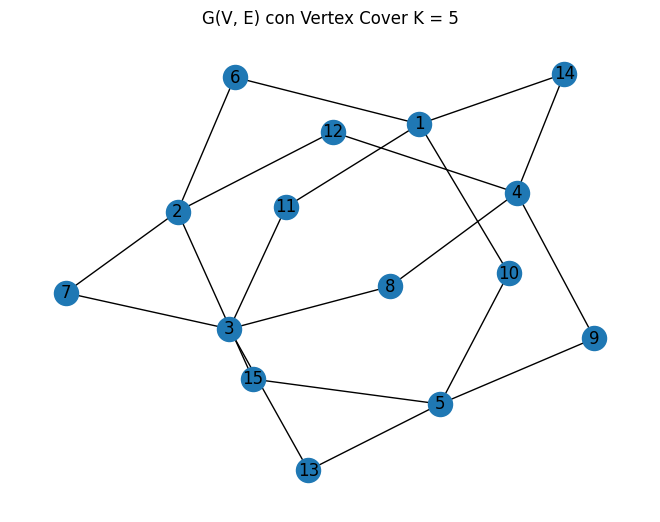


Usuarios con minuto e Ip ingresada:

{1: [(1, 1), (2, 2), (3, 3), (4, 4)], 2: [(5, 5), (6, 6), (7, 7), (8, 8)], 3: [(9, 9), (10, 10), (11, 11), (12, 12)], 4: [(13, 13), (14, 14), (15, 15), (16, 16)], 5: [(17, 17), (18, 18), (19, 19), (20, 20)], 6: [(1, 1), (5, 5)], 7: [(6, 6), (9, 9)], 8: [(10, 10), (13, 13)], 9: [(14, 14), (17, 17)], 10: [(2, 2), (18, 18)], 11: [(3, 3), (11, 11)], 12: [(7, 7), (15, 15)], 13: [(12, 12), (19, 19)], 14: [(4, 4), (16, 16)], 15: [(8, 8), (20, 20)]}

IPs Atacadas:

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Solución No Determinista:

[2, 6, 7, 9, 10, 12]
False

Verificación con Vertex Cover Dado:

[1, 2, 3, 4, 5]


True

In [11]:
# Ejemplo Práctico de la Reducción
# Gráfica de 15 vértices, 20 aristas y con un vertex cover de 5
# Vertex Cover = {1, 2, 3, 4, 5}
grafica = { 1 : [6, 10, 11, 14], 2 : [6, 7, 12, 15], 3 : [7, 8, 11,13], 4 : [8, 9, 12, 14], 5 : [9, 10, 13, 15], 6 : [1, 2], 7 : [2, 3], 8 : [3, 4], 9 : [4, 5], 10 : [5, 1], 11 : [1, 3], 12 : [2, 4], 13 : [3, 5], 14 : [4, 1], 15 : [5, 2]}
k = 5

v, e = elementosG(grafica)
G = nx.Graph()
G.add_nodes_from(v)
G.add_edges_from(e)


nx.draw(G, with_labels = True)
plt.title("G(V, E) con Vertex Cover K = 5")
plt.show()

acc, ipA = reduccion(grafica)
print("\nUsuarios con minuto e Ip ingresada:\n")
print(acc)
print("\nIPs Atacadas:\n")
print(ipA)

print("\nSolución No Determinista:\n")
print(Nodeterminista(acc, ipA, k))

print("\nVerificación con Vertex Cover Dado:\n")
cover = [1, 2, 3, 4, 5]
print(cover)
verificacion(cover, acc, ipA, k)
